### MNIST 손글씨 - CNN v1
- 2x conv2D layers
- 1 FCN layer
- 1 Output layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed= 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리


In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [3]:
# X_train, X_test 정규화(0 ~ 1), 이미지 차원 변경 : 2차원 --> 3차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 512)               18874880  
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [8]:
model_path = 'best-mnist-cnn-v1.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

In [9]:
hist = model.fit(X_train, Y_train, validation_split=0.2, 
                 epochs=100, batch_size=200,
                 callbacks=[mc, es])

Epoch 1/100
239/240 [============================>.] - ETA: 0s - loss: 0.1523 - accuracy: 0.9529
Epoch 1: val_loss improved from inf to 0.05560, saving model to best-mnist-cnn-v1.h5
240/240 [==============================] - 18s 25ms/step - loss: 0.1520 - accuracy: 0.9530 - val_loss: 0.0556 - val_accuracy: 0.9833
Epoch 2/100
240/240 [==============================] - ETA: 0s - loss: 0.0355 - accuracy: 0.9893
Epoch 2: val_loss improved from 0.05560 to 0.05442, saving model to best-mnist-cnn-v1.h5
240/240 [==============================] - 6s 24ms/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0544 - val_accuracy: 0.9853
Epoch 3/100
238/240 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9945
Epoch 3: val_loss improved from 0.05442 to 0.04640, saving model to best-mnist-cnn-v1.h5
240/240 [==============================] - 6s 25ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 4/100
240/240 [============================

In [10]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0398 - accuracy: 0.9873


[0.03975697234272957, 0.9872999787330627]

In [11]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

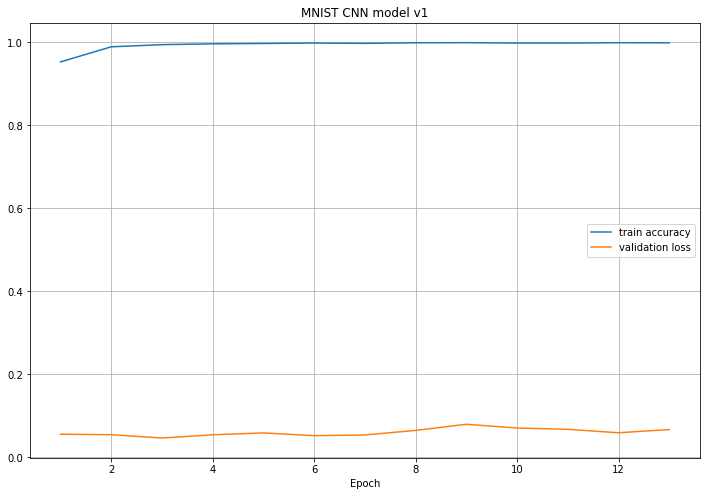

In [12]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('MNIST CNN model v1')
plt.show()

### MNIST 손글씨 - CNN v2
- 2 x conv2D layers
- 1 MaxPooling2D layer
- 1 FCN layer
- 1 Output layer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11501568/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# X_train, X_test 정규화(0 ~ 1), 이미지 차원 변경: 2차원 --> 3차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [6]:

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size=(2,2))
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [8]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [9]:
model_path = 'best-mnist-cnn-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [10]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
240/240 [==============================] - ETA: 0s - loss: 0.1826 - accuracy: 0.9441
Epoch 1: val_loss improved from inf to 0.06064, saving model to best-mnist-cnn-v2.h5
240/240 [==============================] - 15s 16ms/step - loss: 0.1826 - accuracy: 0.9441 - val_loss: 0.0606 - val_accuracy: 0.9819
Epoch 2/100
237/240 [============================>.] - ETA: 0s - loss: 0.0436 - accuracy: 0.9864
Epoch 2: val_loss improved from 0.06064 to 0.05641, saving model to best-mnist-cnn-v2.h5
240/240 [==============================] - 4s 17ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0564 - val_accuracy: 0.9848
Epoch 3/100
239/240 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9918
Epoch 3: val_loss improved from 0.05641 to 0.03803, saving model to best-mnist-cnn-v2.h5
240/240 [==============================] - 4s 19ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0380 - val_accuracy: 0.9884
Epoch 4/100
238/240 [============================

In [13]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0361 - accuracy: 0.9878


[0.03606964275240898, 0.9878000020980835]

In [11]:

y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

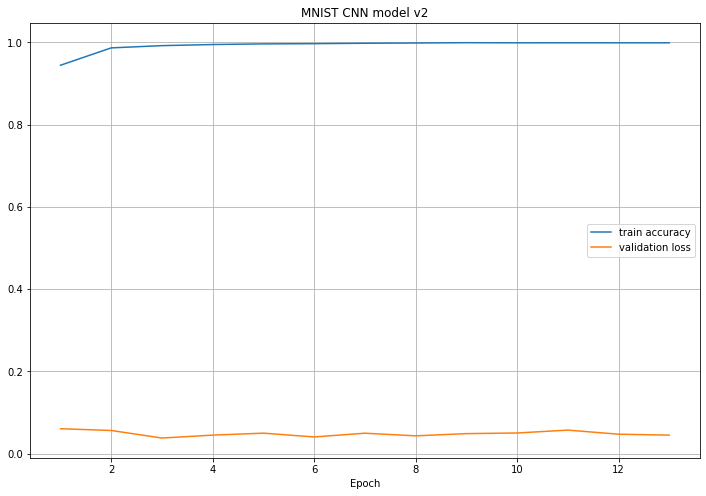

In [12]:

plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('MNIST CNN model v2')
plt.show()

### MNIST 손글씨 - CNN v3
- 2 x conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.25) layer
- 1 Output layer

In [14]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [16]:
# X_train, X_test 정규화(0 ~ 1), 이미지 차원 변경: 2차원 --> 3차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [17]:

# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [18]:

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [19]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4719104   
                                                      

In [20]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [21]:
model_path = 'best-mnist-cnn-v3.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [22]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
240/240 [==============================] - ETA: 0s - loss: 0.2197 - accuracy: 0.9317
Epoch 1: val_loss improved from inf to 0.05581, saving model to best-mnist-cnn-v3.h5
240/240 [==============================] - 4s 15ms/step - loss: 0.2197 - accuracy: 0.9317 - val_loss: 0.0558 - val_accuracy: 0.9839
Epoch 2/100
239/240 [============================>.] - ETA: 0s - loss: 0.0624 - accuracy: 0.9811
Epoch 2: val_loss improved from 0.05581 to 0.04929, saving model to best-mnist-cnn-v3.h5
240/240 [==============================] - 4s 17ms/step - loss: 0.0623 - accuracy: 0.9812 - val_loss: 0.0493 - val_accuracy: 0.9865
Epoch 3/100
240/240 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9870
Epoch 3: val_loss improved from 0.04929 to 0.03822, saving model to best-mnist-cnn-v3.h5
240/240 [==============================] - 4s 15ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.0382 - val_accuracy: 0.9887
Epoch 4/100
237/240 [============================>

In [23]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0265 - accuracy: 0.9909


[0.026520254090428352, 0.9908999800682068]

In [24]:

y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

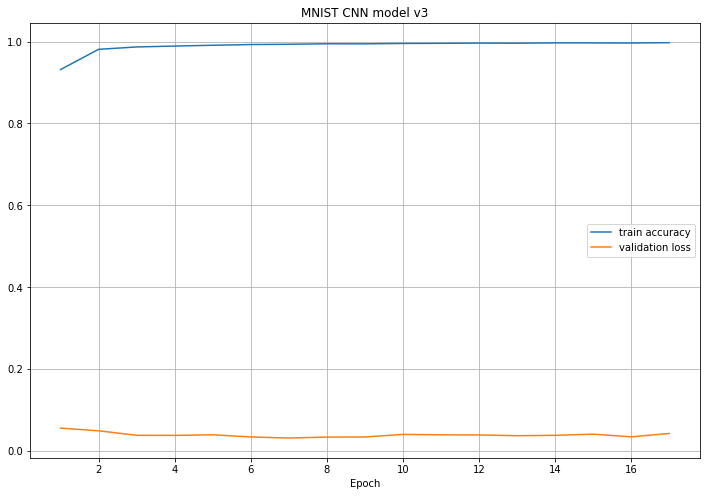

In [25]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('MNIST CNN model v3')
plt.show()

### Fashion MNIST - CNN v1
- 2 x conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.25) layer
- 1 Output layer

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [28]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

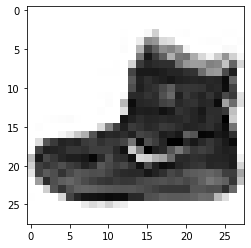

In [29]:
plt.imshow(X_train[0], cmap='Greys');

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

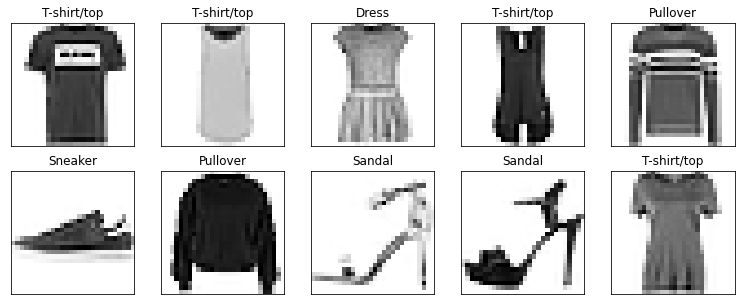

In [32]:
plt.figure(figsize=(13,5))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap='Greys')
    plt.title(class_names[y_train[i]])
    plt.xticks([]), plt.yticks([])
plt.show()

In [33]:
# X_train, X_test 정규화(0 ~ 1), 이미지 차원 변경: 2차원 --> 3차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [34]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [35]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [36]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               4719104   
                                                      

In [37]:

model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [38]:
model_path = 'best-fashion-mnist-cnn-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [39]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
240/240 [==============================] - ETA: 0s - loss: 0.5015 - accuracy: 0.8223
Epoch 1: val_loss improved from inf to 0.32564, saving model to best-fashion-mnist-cnn-v1.h5
240/240 [==============================] - 4s 16ms/step - loss: 0.5015 - accuracy: 0.8223 - val_loss: 0.3256 - val_accuracy: 0.8813
Epoch 2/100
239/240 [============================>.] - ETA: 0s - loss: 0.3133 - accuracy: 0.8867
Epoch 2: val_loss improved from 0.32564 to 0.27745, saving model to best-fashion-mnist-cnn-v1.h5
240/240 [==============================] - 4s 17ms/step - loss: 0.3133 - accuracy: 0.8868 - val_loss: 0.2775 - val_accuracy: 0.9003
Epoch 3/100
237/240 [============================>.] - ETA: 0s - loss: 0.2598 - accuracy: 0.9045
Epoch 3: val_loss improved from 0.27745 to 0.23735, saving model to best-fashion-mnist-cnn-v1.h5
240/240 [==============================] - 4s 15ms/step - loss: 0.2600 - accuracy: 0.9044 - val_loss: 0.2373 - val_accuracy: 0.9115
Epoch 4/100
237/240 [=====

In [40]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.9222


[0.2171856015920639, 0.9222000241279602]

In [41]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

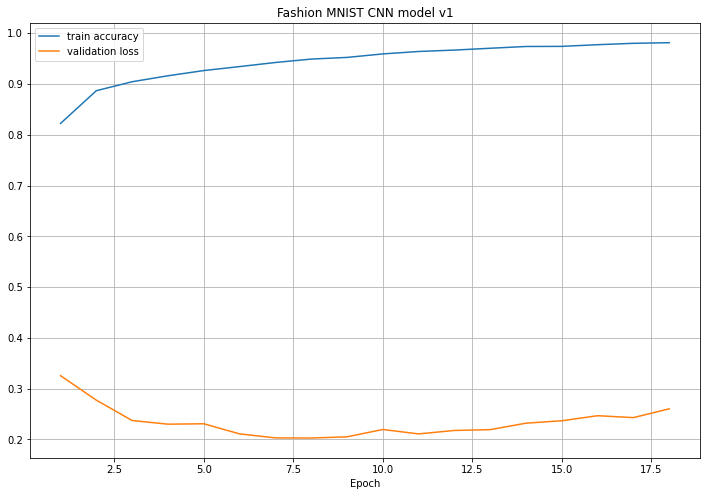

In [42]:

plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('Fashion MNIST CNN model v1')
plt.show()

### Fashion MNIST - CNN v2
- 2 x conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [43]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               6423040   
                                                      

In [44]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [45]:

model_path = 'best-fashion-mnist-cnn-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [46]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
240/240 [==============================] - ETA: 0s - loss: 0.4658 - accuracy: 0.8349
Epoch 1: val_loss improved from inf to 0.29947, saving model to best-fashion-mnist-cnn-v2.h5
240/240 [==============================] - 5s 17ms/step - loss: 0.4658 - accuracy: 0.8349 - val_loss: 0.2995 - val_accuracy: 0.8889
Epoch 2/100
239/240 [============================>.] - ETA: 0s - loss: 0.2894 - accuracy: 0.8963
Epoch 2: val_loss improved from 0.29947 to 0.26023, saving model to best-fashion-mnist-cnn-v2.h5
240/240 [==============================] - 4s 19ms/step - loss: 0.2895 - accuracy: 0.8963 - val_loss: 0.2602 - val_accuracy: 0.9047
Epoch 3/100
240/240 [==============================] - ETA: 0s - loss: 0.2388 - accuracy: 0.9129
Epoch 3: val_loss improved from 0.26023 to 0.22690, saving model to best-fashion-mnist-cnn-v2.h5
240/240 [==============================] - 4s 17ms/step - loss: 0.2388 - accuracy: 0.9129 - val_loss: 0.2269 - val_accuracy: 0.9142
Epoch 4/100
240/240 [=====

In [47]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2133 - accuracy: 0.9276


[0.2133229523897171, 0.9276000261306763]

In [48]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

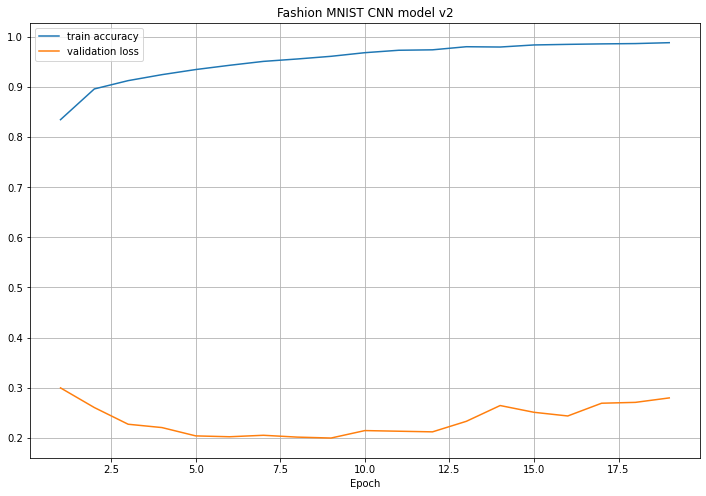

In [49]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('Fashion MNIST CNN model v2')
plt.show()

### 개, 고양이 분류(partial) - CNN v1
- 부분 데이터 : 훈련 개 : 1000, 고양이 : 1000; 테스트 개 : 500, 고양이 : 500
- 이미지 센터링 처리 x

In [50]:

!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-05-24 22:55:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.251.10.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  60.4MB/s    in 1.1s    

2022-05-24 22:55:06 (60.4 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [51]:
!unzip cats_and_dogs_filtered.zip > /dev/null

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [54]:
train_dir = 'cats_and_dogs_filtered/train'
validation_dir = 'cats_and_dogs_filtered/validation'
train_cats_dir = 'cats_and_dogs_filtered/train/cats'
train_dogs_dir = 'cats_and_dogs_filtered/train/dogs'
validation_cats_dir = 'cats_and_dogs_filtered/validation/cats'
validation_dogs_dir = 'cats_and_dogs_filtered/validation/dogs'

In [55]:
import os

train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames)
print(train_dogs_fnames)

['cat.504.jpg', 'cat.928.jpg', 'cat.92.jpg', 'cat.833.jpg', 'cat.524.jpg', 'cat.661.jpg', 'cat.279.jpg', 'cat.567.jpg', 'cat.899.jpg', 'cat.577.jpg', 'cat.822.jpg', 'cat.409.jpg', 'cat.523.jpg', 'cat.973.jpg', 'cat.182.jpg', 'cat.864.jpg', 'cat.449.jpg', 'cat.484.jpg', 'cat.31.jpg', 'cat.232.jpg', 'cat.354.jpg', 'cat.341.jpg', 'cat.663.jpg', 'cat.915.jpg', 'cat.187.jpg', 'cat.651.jpg', 'cat.496.jpg', 'cat.690.jpg', 'cat.575.jpg', 'cat.455.jpg', 'cat.563.jpg', 'cat.838.jpg', 'cat.155.jpg', 'cat.512.jpg', 'cat.950.jpg', 'cat.333.jpg', 'cat.397.jpg', 'cat.463.jpg', 'cat.781.jpg', 'cat.170.jpg', 'cat.5.jpg', 'cat.585.jpg', 'cat.785.jpg', 'cat.502.jpg', 'cat.474.jpg', 'cat.168.jpg', 'cat.817.jpg', 'cat.800.jpg', 'cat.960.jpg', 'cat.628.jpg', 'cat.555.jpg', 'cat.405.jpg', 'cat.268.jpg', 'cat.846.jpg', 'cat.897.jpg', 'cat.797.jpg', 'cat.234.jpg', 'cat.611.jpg', 'cat.165.jpg', 'cat.693.jpg', 'cat.760.jpg', 'cat.196.jpg', 'cat.926.jpg', 'cat.875.jpg', 'cat.358.jpg', 'cat.493.jpg', 'cat.163.jpg'

In [57]:
len(train_cats_fnames), len(train_dogs_fnames)

(1000, 1000)

In [59]:
fname = os.path.join(train_cats_dir, 'cat.475.jpg')
fname

'cats_and_dogs_filtered/train/cats/cat.475.jpg'

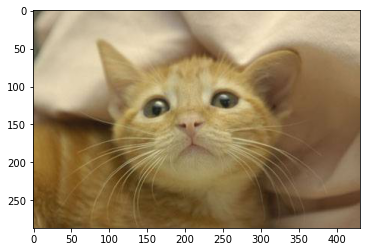

In [60]:
from  PIL import Image
img = Image.open(fname)
plt.imshow(img);

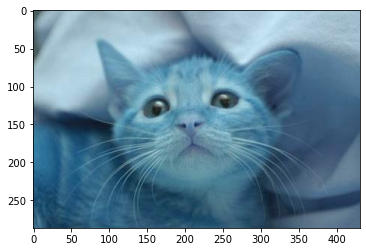

In [61]:
# 2) OpenCV image, 순서가 RGB가 아니고, BGR로 읽음
import cv2
img2 = cv2.imread(fname)
plt.imshow(img2)

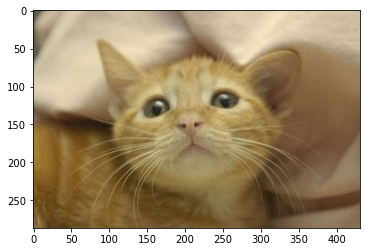

In [62]:
img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img3);

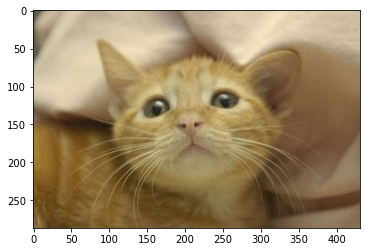

In [63]:
img2 = img2[:, :, ::-1]
plt.imshow(img2);

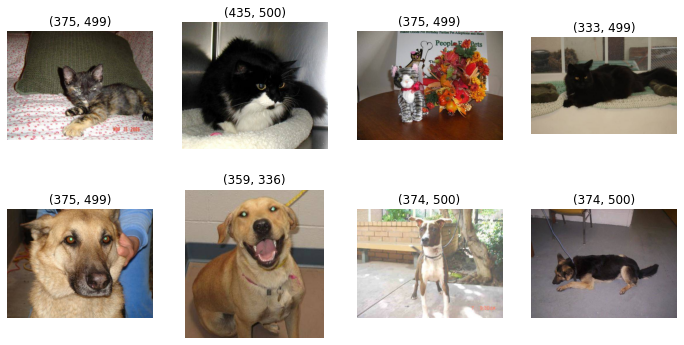

In [64]:
plt.figure(figsize=(12,6))
for i in range(4):
    plt.subplot(2, 4, i+1)
    cat = cv2.imread(os.path.join(train_cats_dir, train_cats_fnames[i]))[:,:,::-1]
    plt.imshow(cat), plt.axis('off'), plt.title(cat.shape[:-1])
    plt.subplot(2, 4, i+5)
    dog = cv2.imread(os.path.join(train_dogs_dir, train_dogs_fnames[i]))[:,:,::-1]
    plt.imshow(dog), plt.axis('off'), plt.title(dog.shape[:-1])
plt.show()

In [65]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [68]:
model = Sequential([
    Conv2D(16, (3,3), input_shape = (150, 150, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [69]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001, decay=1e-8),
    loss = 'binary_crossentropy', metrics = ['accuracy']
)

In [70]:
model_path = 'best-cats-and-dogs-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

- 파일에서 이미지 데이터 읽어서 학습시키는 방법

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1 / 255.)
test_datagen = ImageDataGenerator(rescale = 1 / 255.)

In [73]:
train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode='binary', target_size=(150, 150)
)

test_generator = test_datagen.flow_from_directory(
    validation_dir, batch_size=20, class_mode='binary', target_size=(150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [75]:
hist = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 100, steps_per_epoch = 100,
    validation_steps = 50, callbacks=[mc, es]
)

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.7829 - accuracy: 0.5715
Epoch 1: val_loss improved from inf to 0.65260, saving model to best-cats-and-dogs-v1.h5
100/100 [==============================] - 11s 94ms/step - loss: 0.7829 - accuracy: 0.5715 - val_loss: 0.6526 - val_accuracy: 0.5570
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.6195 - accuracy: 0.6655
Epoch 2: val_loss did not improve from 0.65260
100/100 [==============================] - 9s 91ms/step - loss: 0.6195 - accuracy: 0.6655 - val_loss: 0.7296 - val_accuracy: 0.5770
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.5448 - accuracy: 0.7235
Epoch 3: val_loss improved from 0.65260 to 0.63979, saving model to best-cats-and-dogs-v1.h5
100/100 [==============================] - 10s 99ms/step - loss: 0.5448 - accuracy: 0.7235 - val_loss: 0.6398 - val_accuracy: 0.6570
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 0.4635 - ac

In [76]:
best_model = load_model(model_path)

In [77]:
from google.colab import files

up = files.upload()

Saving 개.jpg to 개.jpg
Saving 개1.jfif to 개1.jfif
Saving 개2.jpg to 개2.jpg
Saving 고양이.jpg to 고양이.jpg
Saving 고양이1.jpg to 고양이1.jpg
Saving 고양이2.jfif to 고양이2.jfif


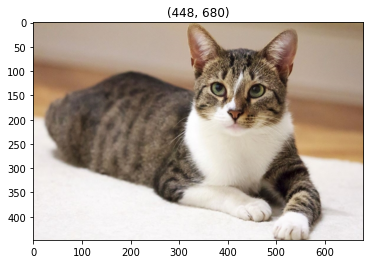

In [78]:

img = cv2.imread('고양이.jpg')[:,:,::-1]
plt.imshow(img), plt.title(img.shape[:-1]);

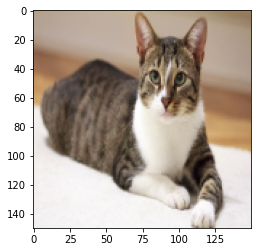

In [79]:
# 150 x 150 size
img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [80]:
best_model.predict(img.reshape(1,150,150,3))

array([[4.574304e-11]], dtype=float32)

In [81]:
img.shape[:-1]

(150, 150)

In [83]:
for fname in up.keys():
    img = cv2.imread(fname)[:, :, ::-1]
    if sum(img.shape[:-1]) > 300:
        img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_AREA)
    else :
        img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    classes =  best_model.predict(img.reshape(-1, 150, 150, 3))
    print(f"{classes[0,0]:.4f} {fname} is a {'dog' if classes[0,0] > 0.5 else 'cat'}")

1.0000 개.jpg is a dog
1.0000 개1.jfif is a dog
0.0000 개2.jpg is a cat
0.0000 고양이.jpg is a cat
0.0000 고양이1.jpg is a cat
0.0000 고양이2.jfif is a cat


### 개, 고양이 분류(partial) - CNN v1
- 부분 데이터 : 훈련 개 : 1000, 고양이 : 1000; 테스트 개 : 500, 고양이 : 500
- 이미지 센터링 처리 x

In [84]:
IMAGE_SIZE = 150

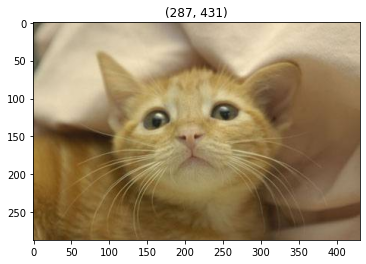

In [85]:
import cv2
fname = 'cats_and_dogs_filtered/train/cats/cat.475.jpg'
img = cv2.imread(fname)[:,:,::-1]
plt.imshow(img), plt.title(img.shape[:-1]);

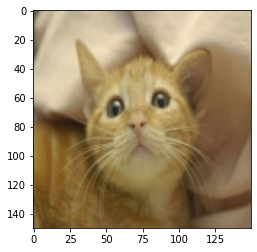

In [86]:

plt.imshow(cv2.resize(img, dsize=(150,150), interpolation=cv2.INTER_AREA));

In [88]:
h, w, _ = img.shape
h, w

(287, 431)

In [89]:
if h > w:
    width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
else :
    width, height = (w * IMAGE_SIZE) // h , IMAGE_SIZE

In [92]:
# Pillow image: new_img = np.array(img.resize((width, height)))
new_img = cv2.resize(img, dsize = (width, height), interpolation=cv2.INTER_AREA)
new_img.shape

(150, 225, 3)

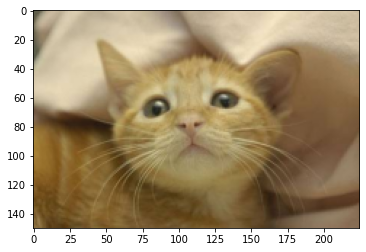

In [93]:
plt.imshow(new_img)

In [94]:
diff = abs(width-height) // 2

In [95]:
if h > w:
    final_img = new_img[diff:diff+IMAGE_SIZE, :]
else :
    final_img = new_img[:, diff:diff+IMAGE_SIZE, ]

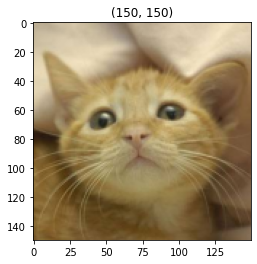

In [96]:
 
plt.imshow(final_img), plt.title(final_img.shape[:-1]);

In [97]:
from PIL import Image
def center_image(img, src_format='OpenCV', dst_format='OpenCV'):
    if src_format == 'OpenCV':
        h, w = img.shape[:-1]
    else:                       # Pillow
        h, w = np.array(img).shape[:-1]

    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE

    interpolation = cv2.INTER_AREA if h + w > 300 else cv2.INTER_CUBIC
    new_img = cv2.resize(img, dsize=(width, height), interpolation=interpolation)

    diff = abs(width - height) // 2
    if h > w:
        final_img = new_img[diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[:, diff:diff+IMAGE_SIZE]

    return final_img if dst_format == 'OpenCV' else Image.fromarray(final_img)

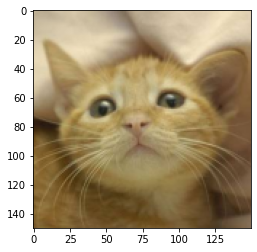

In [98]:
img = cv2.imread(fname)[:,:,::-1]
plt.imshow(center_image(img));

In [99]:
CENTER_DIR = 'cats_and_dogs_centered'
train_dir = f'{CENTER_DIR}/train'
validation_dir = f'{CENTER_DIR}/validation'
train_cats_dir = f'{CENTER_DIR}/train/cats'
train_dogs_dir = f'{CENTER_DIR}/train/dogs'
validation_cats_dir = f'{CENTER_DIR}/validation/cats'
validation_dogs_dir = f'{CENTER_DIR}/validation/dogs'

In [100]:

import os
if not os.path.exists(CENTER_DIR):
    os.mkdir(CENTER_DIR)
for dir in [train_dir,validation_dir,train_cats_dir,train_dogs_dir,validation_cats_dir,validation_dogs_dir]:
    os.mkdir(dir)

In [101]:
old_train_cats_dir = 'cats_and_dogs_filtered/train/cats'
old_train_dogs_dir = 'cats_and_dogs_filtered/train/dogs'
old_validation_cats_dir = 'cats_and_dogs_filtered/validation/cats'
old_validation_dogs_dir = 'cats_and_dogs_filtered/validation/dogs'

In [102]:
# cats_and_dogs_filtered -> image 축소/확대후 centering -> cats_and_dogs_centered
from glob import glob

for src_dir in [old_train_cats_dir,old_train_dogs_dir,old_validation_cats_dir,old_validation_dogs_dir]:
    dst_dir = src_dir.replace('filtered', 'centered')
    for fname in glob(f'{src_dir}/*.jpg'):
        dst_fname = fname.split('/')[-1]
        src_img = cv2.imread(fname)[:,:,::-1]
        dst_img = center_image(src_img, src_format='OpenCV', dst_format='Pillow')
        dst_img.save(f'{dst_dir}/{dst_fname}')

In [103]:

# 파일 이름
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

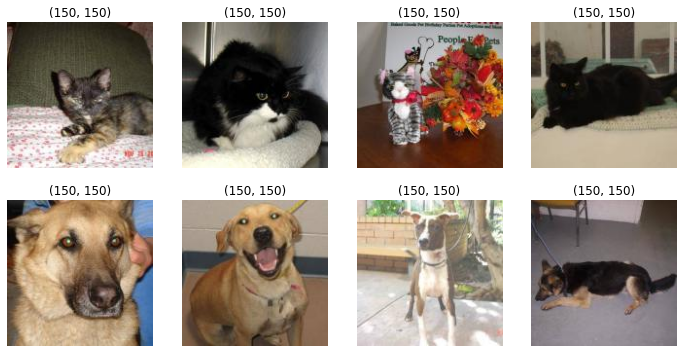

In [104]:
plt.figure(figsize=(12,6))
for i in range(4):
    plt.subplot(2, 4, i+1)
    cat = cv2.imread(os.path.join(train_cats_dir, train_cats_fnames[i]))[:,:,::-1]
    plt.imshow(cat), plt.axis('off'), plt.title(cat.shape[:-1])
    plt.subplot(2, 4, i+5)
    dog = cv2.imread(os.path.join(train_dogs_dir, train_dogs_fnames[i]))[:,:,::-1]
    plt.imshow(dog), plt.axis('off'), plt.title(dog.shape[:-1])
plt.show()

In [105]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [106]:
model = Sequential([ 
    Conv2D(16, (3,3), input_shape=(150,150,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [107]:

from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001, decay=1e-8),
    loss='binary_crossentropy', metrics=['accuracy']
)

In [108]:

model_path = 'best-cats-and-dogs-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [109]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [110]:
train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode='binary', target_size=(150,150)
)
test_generator = test_datagen.flow_from_directory(
    validation_dir, batch_size=20, class_mode='binary', target_size=(150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [111]:
hist = model.fit(
    train_generator, 
    validation_data=test_generator,
    epochs=100, steps_per_epoch=100,
    validation_steps=50, callbacks=[mc, es]
)

Epoch 1/100
 98/100 [============================>.] - ETA: 0s - loss: 0.8622 - accuracy: 0.5740
Epoch 1: val_loss improved from inf to 0.79671, saving model to best-cats-and-dogs-v2.h5
100/100 [==============================] - 5s 35ms/step - loss: 0.8578 - accuracy: 0.5745 - val_loss: 0.7967 - val_accuracy: 0.5040
Epoch 2/100
 98/100 [============================>.] - ETA: 0s - loss: 0.6569 - accuracy: 0.6332
Epoch 2: val_loss improved from 0.79671 to 0.59710, saving model to best-cats-and-dogs-v2.h5
100/100 [==============================] - 3s 34ms/step - loss: 0.6557 - accuracy: 0.6345 - val_loss: 0.5971 - val_accuracy: 0.6840
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 0.5848 - accuracy: 0.6980
Epoch 3: val_loss did not improve from 0.59710
100/100 [==============================] - 3s 30ms/step - loss: 0.5851 - accuracy: 0.6975 - val_loss: 0.6272 - val_accuracy: 0.6580
Epoch 4/100
 99/100 [============================>.] - ETA: 0s - loss: 0.4984 - accu

In [112]:
best_model = load_model(model_path)
best_model